# Single uncertainty sensititivy analysis - Time Horizon Uncertainty
* EMA Society's response to climate change
* Name: Sebastiaan Greeven
* Date: 12-5-2015
#### Introduction
This notebook contains the single uncertainty sensitivity analysis of the time horizon uncertainty. 

1. Initialisation of the analysis
2. Visualisation of the sensitivity analysis
3. PRIM analysis

#1. Initialisation of the analysis

In [1]:
sns.set_palette("deep")


In [2]:
from ema_workbench.util import load_results, ema_logging

from ema_workbench.analysis.plotting import lines, envelopes
from ema_workbench.analysis.plotting_util import VIOLIN, KDE
from ema_workbench.analysis.pairs_plotting import pairs_lines, pairs_scatter, pairs_density
from ema_workbench.analysis import prim

import mpld3

vensim dll not found, vensim functionality not available


In [3]:
ema_logging.log_to_stderr(ema_logging.INFO)

results = load_results(r'./data/time horizon 1000 exp 100 rep.tar.gz')

[INFO] results loaded succesfully from ./data/time horizon 1000 exp 100 rep.tar.gz


#2. Visualisation of the sensitivity analysis

/Users/jhkwakkel/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/jhkwakkel/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


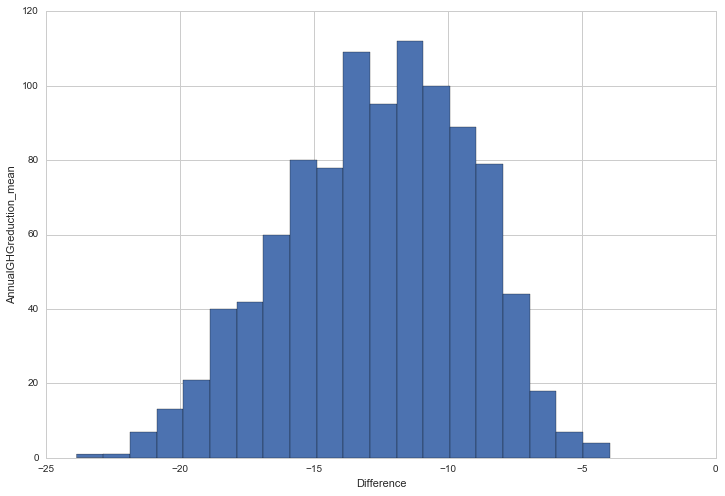

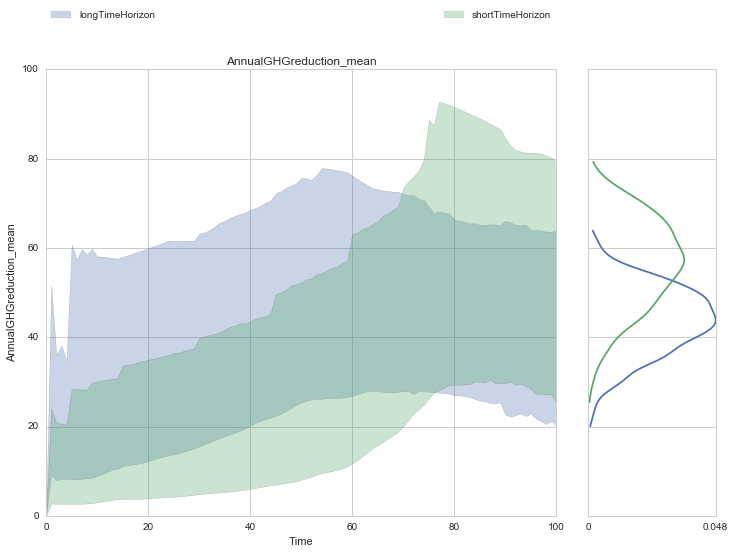

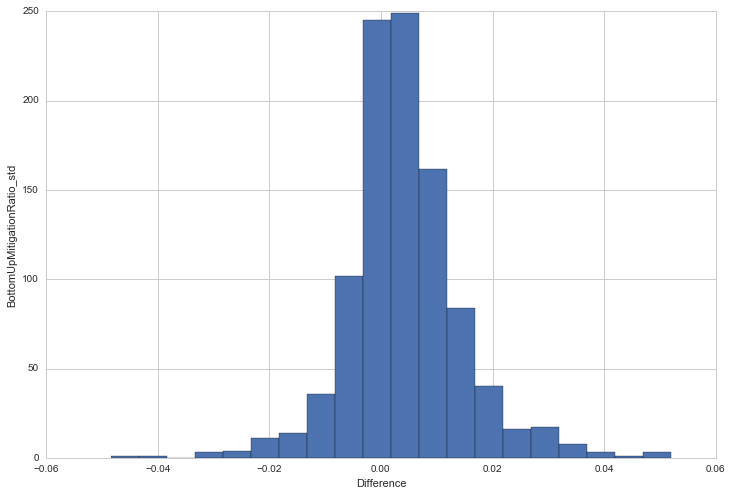

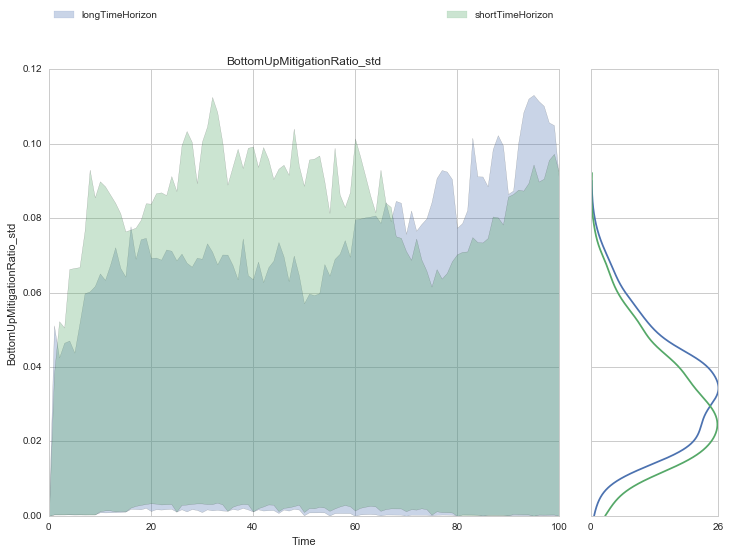

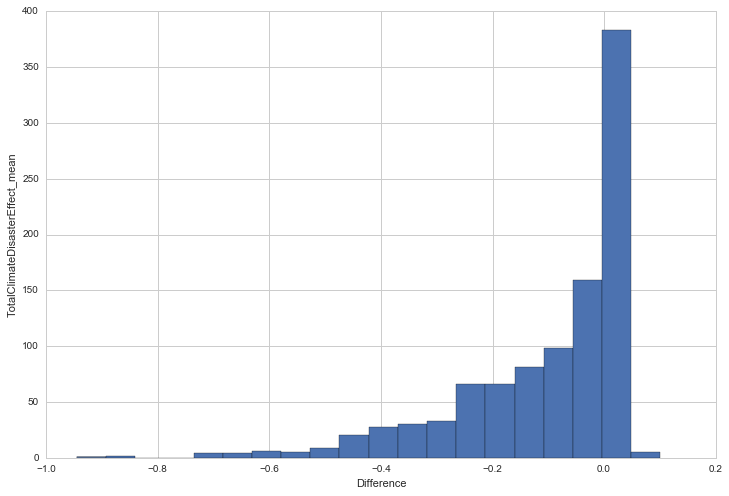

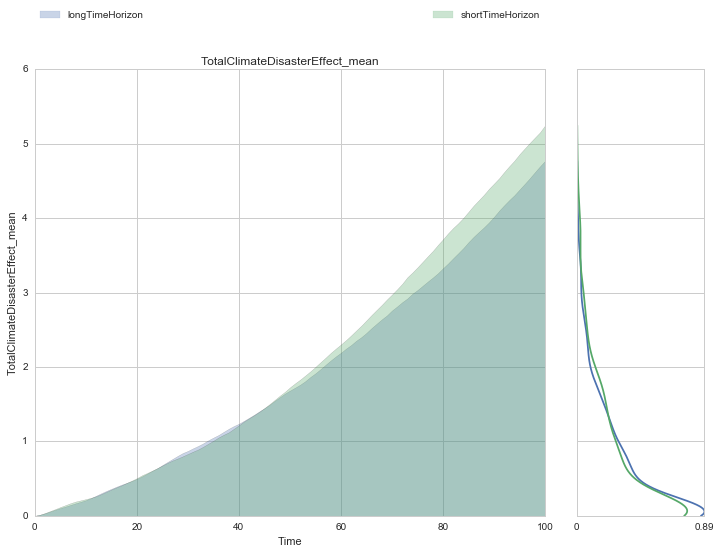

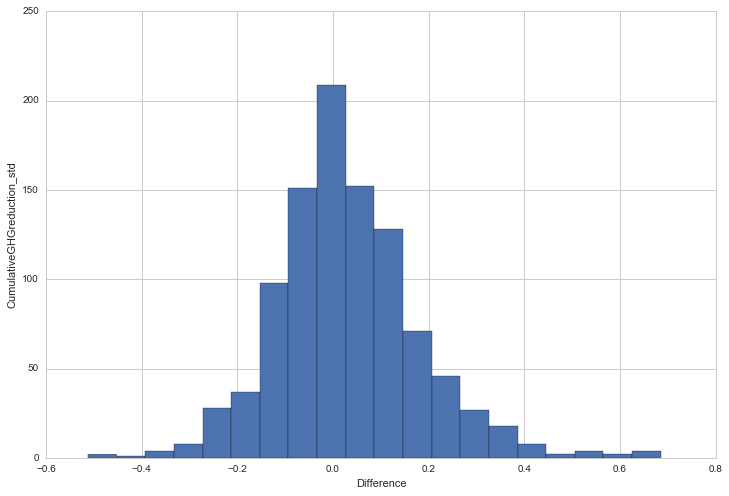

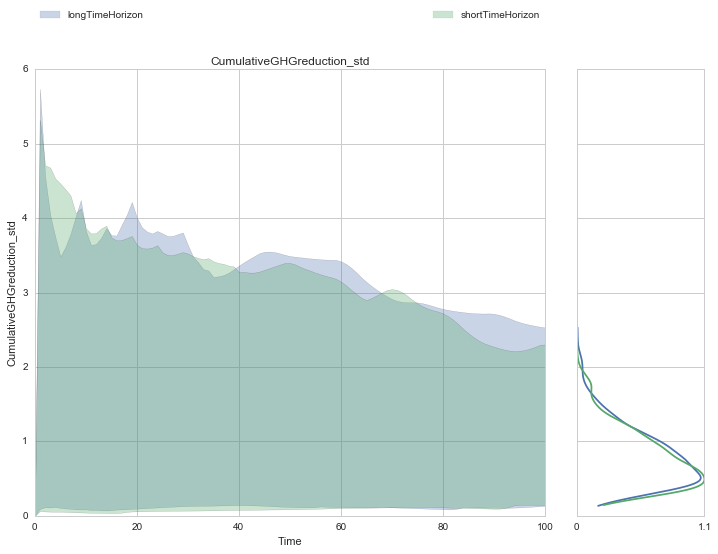

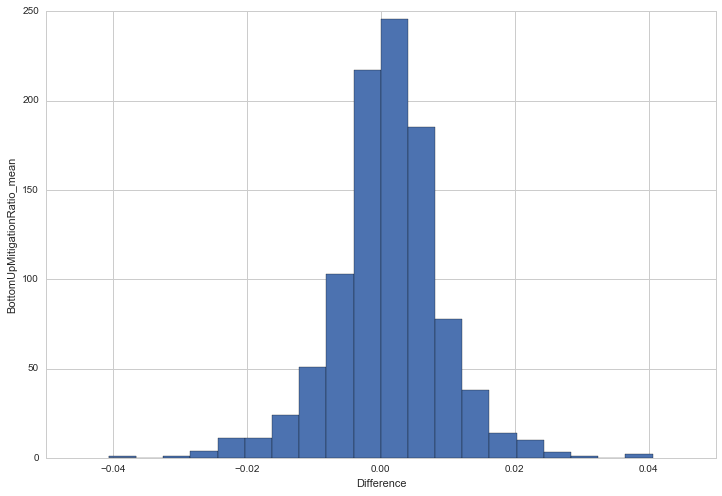

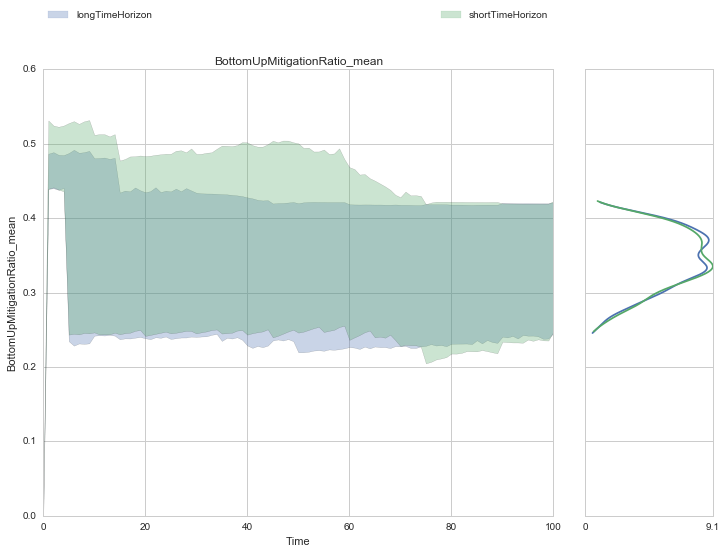

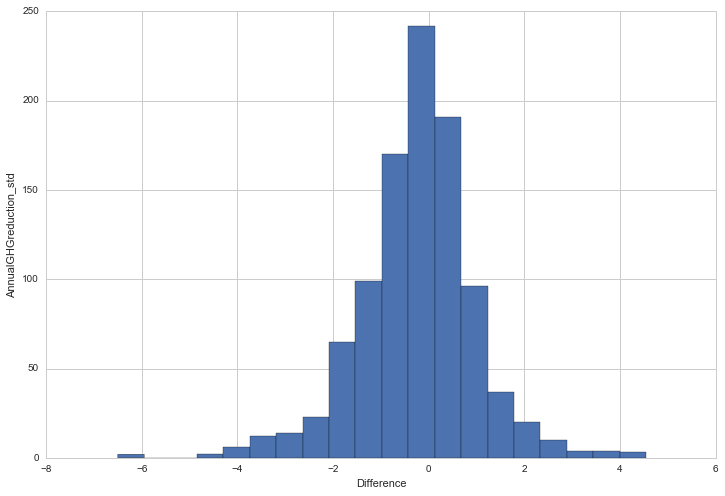

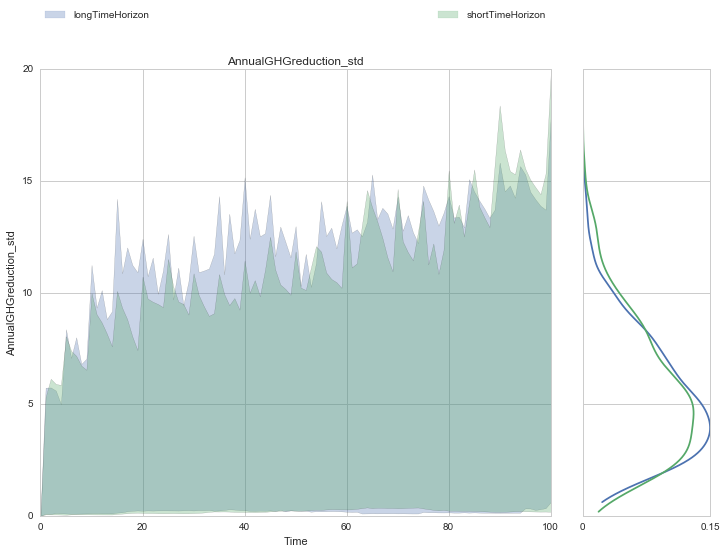

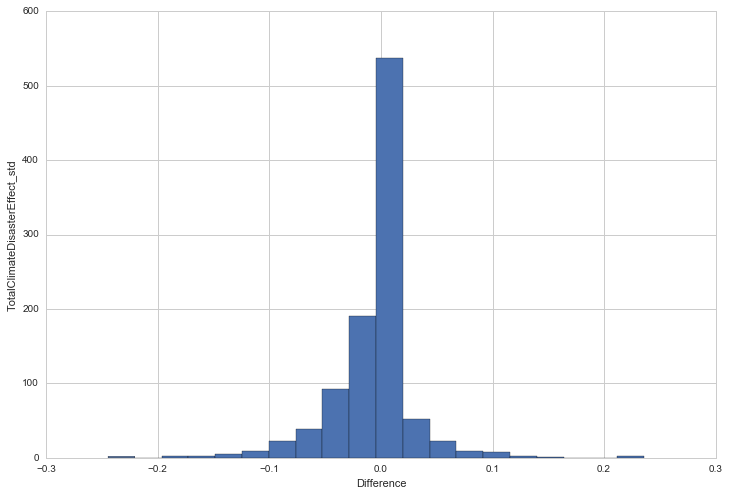

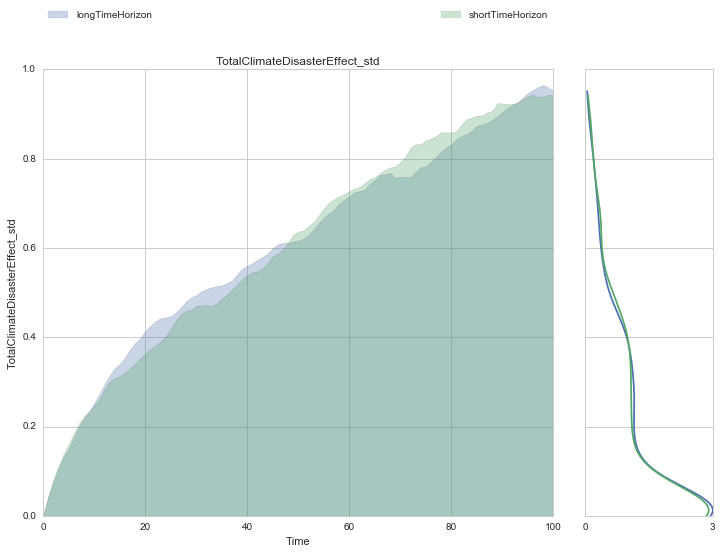

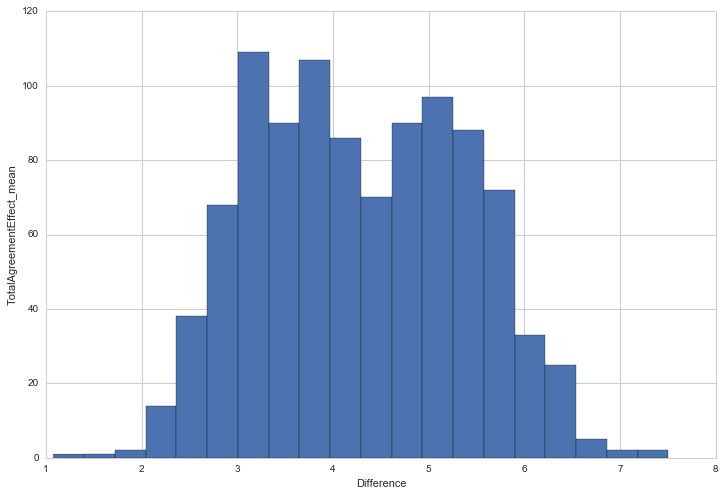

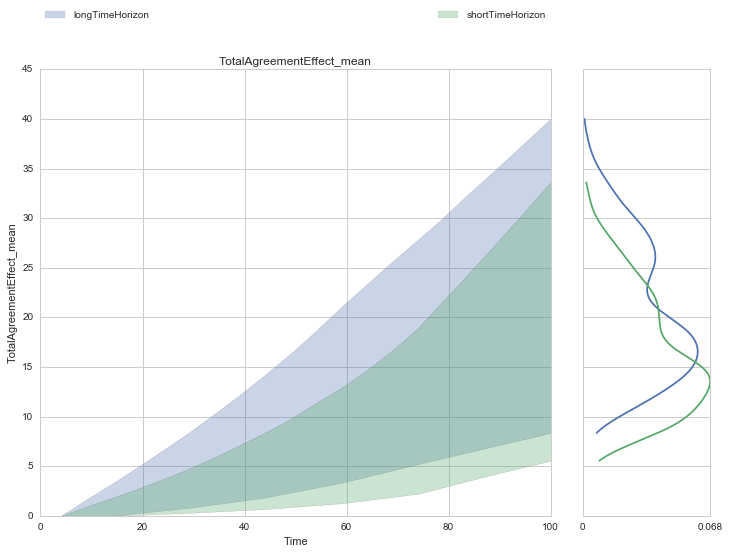

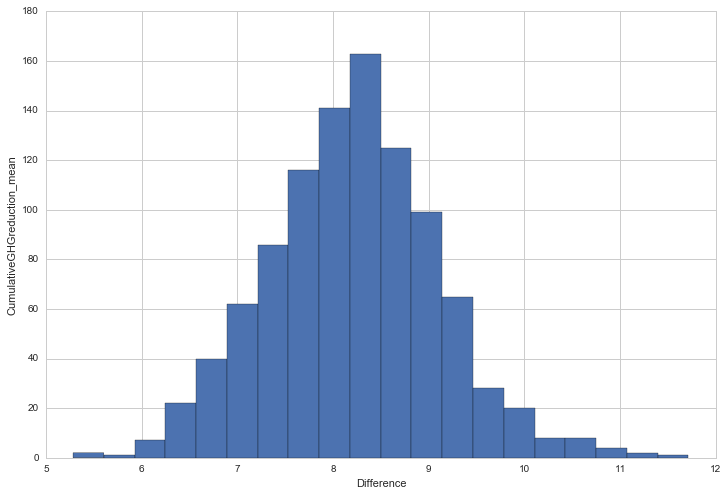

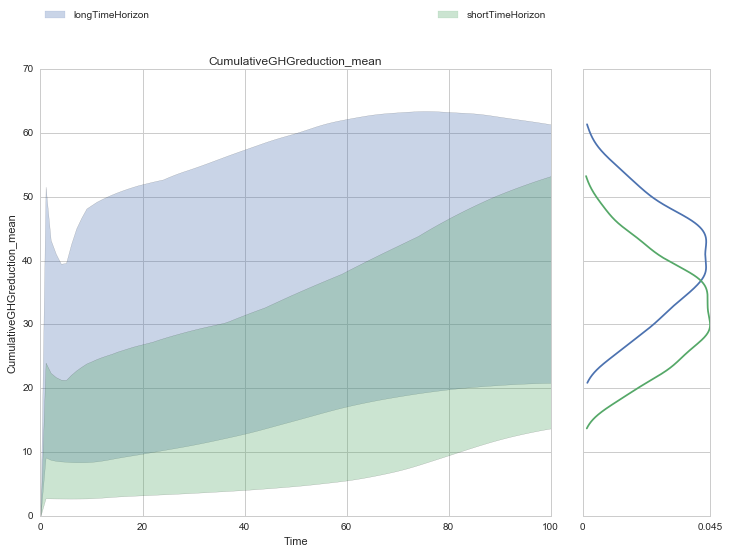

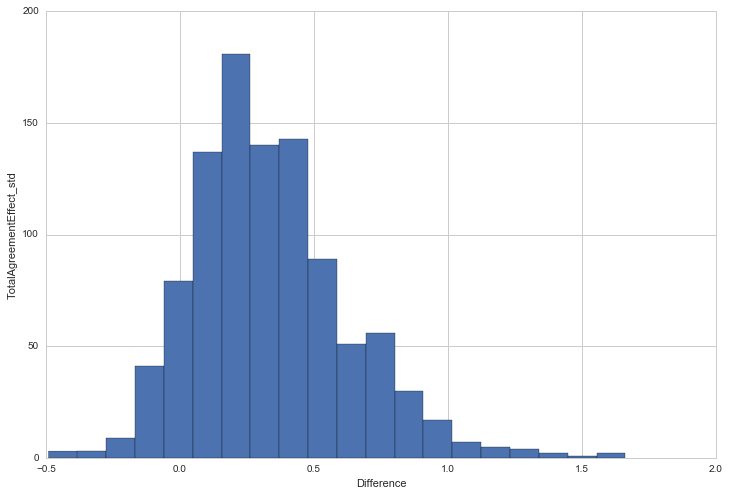

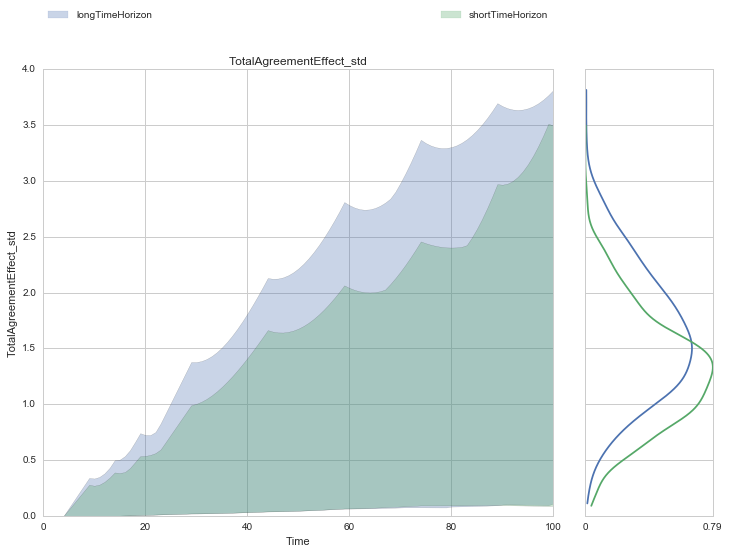

In [4]:
experiments, outcomes = results

models = set(experiments['model'])

grouped_results = {}
for model in models:
    logical = experiments['model']==model
    
    temp_experiments = experiments[logical]
    temp_outcomes = {key:value[logical] for key, value in outcomes.items()}
    grouped_results[model] = temp_experiments, temp_outcomes

oois = outcomes.keys()
    
for ooi in oois:
    models = list(models)
    ooi_dif = grouped_results[models[0]][1][ooi] - grouped_results[models[1]][1][ooi]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(ooi_dif[:,-1], bins=20)
    ax.set_ylabel(ooi)
    ax.set_xlabel('Difference')
    plt.show()
    envelopes(results, group_by='model', outcomes_to_show=ooi, fill=True, density='kde')

/Users/jhkwakkel/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/jhkwakkel/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


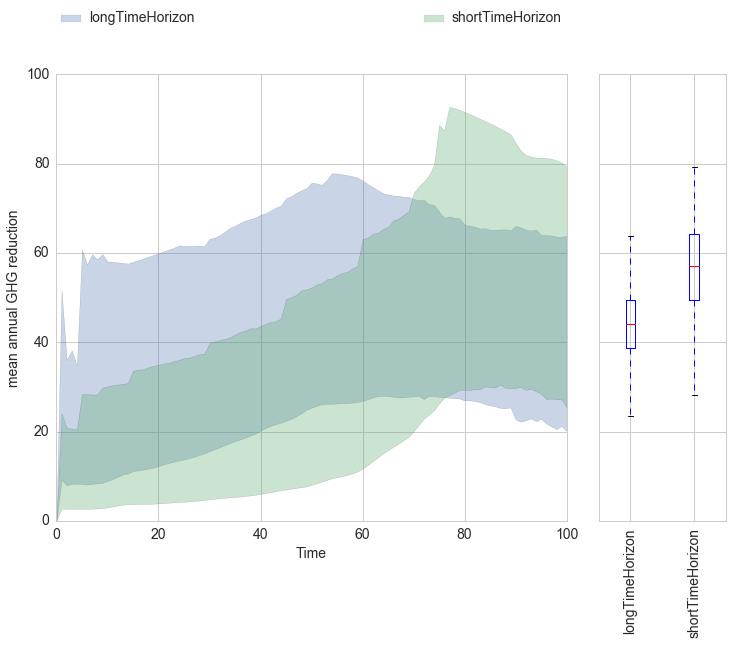

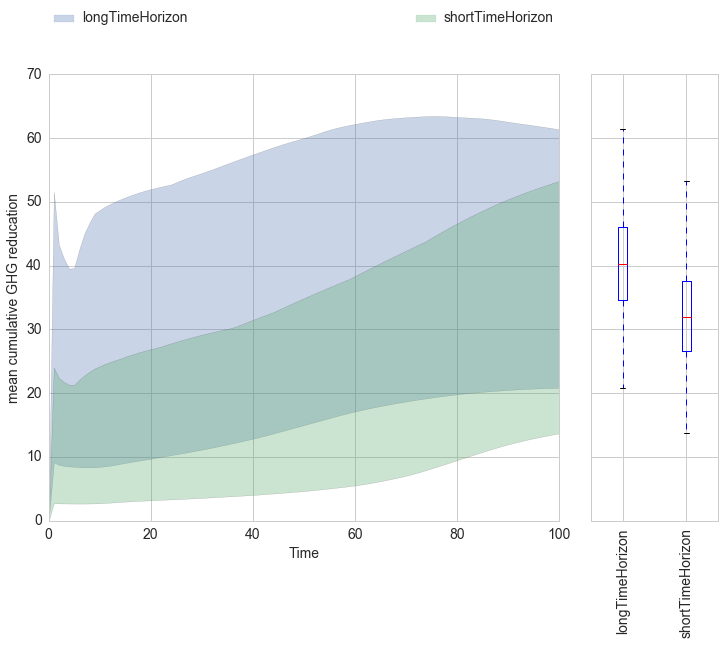

In [4]:
from ema_workbench.analysis.plotting_util import KDE, HIST, BOXPLOT

experiments, outcomes = results

models = set(experiments['model'])

grouped_results = {}
for model in models:
    logical = experiments['model']==model
    
    temp_experiments = experiments[logical]
    temp_outcomes = {key:value[logical] for key, value in outcomes.items()}
    grouped_results[model] = temp_experiments, temp_outcomes

oois = [u'AnnualGHGreduction_mean', u'CumulativeGHGreduction_mean']

ylabels = {u'AnnualGHGreduction_mean': 'mean annual GHG reduction',
           u'CumulativeGHGreduction_mean': 'mean cumulative GHG reducation'}
    
for i, ooi in enumerate(oois):
    models = list(models)
    ooi_dif = grouped_results[models[0]][1][ooi] - grouped_results[models[1]][1][ooi]
    fig, axes = envelopes(results, group_by='model', outcomes_to_show=ooi, 
                          fill=True, density=BOXPLOT, ylabels=ylabels, titles=None)
    change_fontsize(fig)
    save_fig(fig, './figs/', 'fig6{}'.format(chr(i + ord('a'))))
    

In [19]:
ax = axes['CumulativeGHGreduction_mean']
for entry in ax.legend_.get_texts():
    print entry.set_fontsize(14)

None
None


#3. PRIM analysis

In [15]:
import numpy.lib.recfunctions as rf

In [16]:
experiments =  rf.drop_fields(grouped_results[models[0]][0], 'model')

In [17]:
ooi_dif = grouped_results[models[0]][1]['CumulativeGHGreduction_mean'] - grouped_results[models[1]][1]['CumulativeGHGreduction_mean']

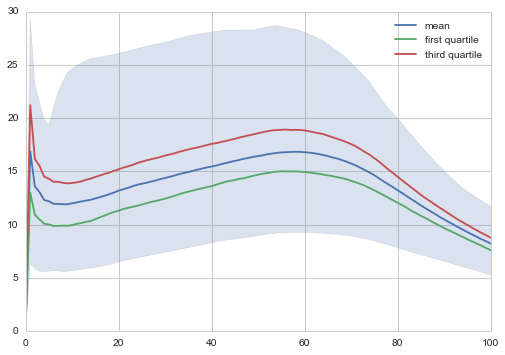

In [18]:
data = ooi_dif

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.median(data, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data.shape[1]),np.min(data, axis=0), np.max(data, axis=0), alpha=0.2)
ax.plot(np.percentile(data, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data, 75, axis=0), label='third quartile')

ax.legend()
plt.show()

In [19]:
temp_outcomes = {'dif':ooi_dif}
results = experiments, temp_outcomes

def classify(data):
    outcome = data['dif'][:,-1]
    classes = np.zeros(outcome.shape)
    classes[outcome>8] = 1
    return classes

prim_obj = Prim(results, classify, threshold=0.8)

In [20]:
box1 = prim_obj.find_box()
box1.show_tradeoff()
mpld3.display()

[INFO/MainProcess] 1000 points remaining, containing 592 cases of interest
[INFO/MainProcess] mean: 1.0, mass: 0.114, coverage: 0.192567567568, density: 1.0 restricted_dimensions: 7.0


In [21]:
box1.inspect(2)
box1.inspect(3)
box1.inspect(7)

coverage    0.959459
density     0.629712
mass        0.902000
mean        0.629712
res dim     1.000000
Name: 2, dtype: float64

                              box 2                      
                                min        max  qp values
SDTimeHorizonDistribution  0.018352  18.039882   0.011294

coverage    0.609797
density     0.807606
mass        0.447000
mean        0.807606
res dim     2.000000
Name: 3, dtype: float64

                                          box 3                            
                                            min           max     qp values
ClimateDisasterIncreaseMitigation  set([False])  set([False])  2.221995e-16
SDTimeHorizonDistribution            0.01835166      18.03988   0.003151264

coverage    0.540541
density     0.886427
mass        0.361000
mean        0.886427
res dim     3.000000
Name: 7, dtype: float64

                                          box 7                            
                                            min       

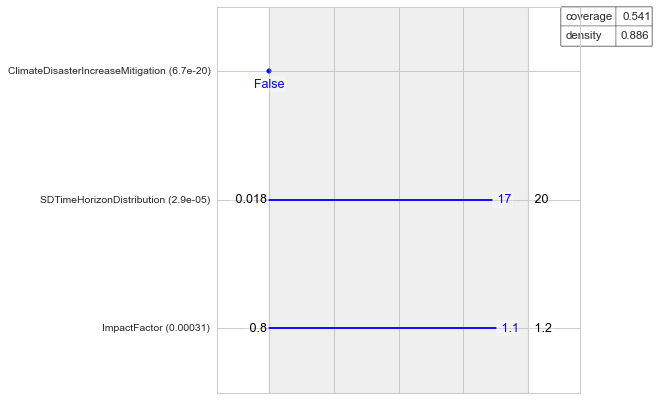

In [22]:
box1.inspect(7, style='graph')
plt.show()

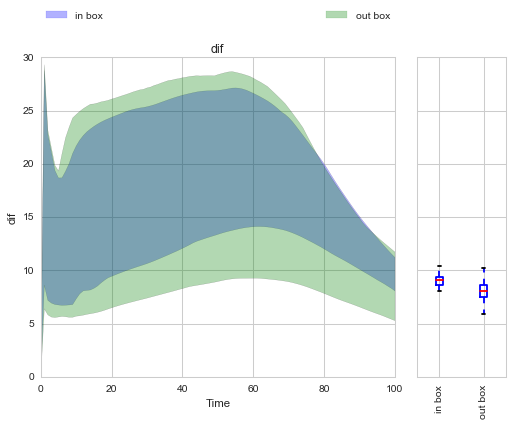

In [23]:
from analysis.plotting_util import BOXPLOT

indices = box1.yi

all_indices = np.arange(experiments.shape[0])
logical = np.ones((all_indices.shape[0],), dtype=np.bool)
logical[indices] = 0
out_box = all_indices[logical]

gs = {}
gs['in box'] = indices
gs['out box'] = out_box
# gs['all'] = all_indices

envelopes(results, outcomes_to_show=['dif'], group_by='index', grouping_specifiers=gs, fill=True, density=BOXPLOT)
plt.show()

In [49]:
ooi_dif = grouped_results[models[0]][1]['AnnualGHGreduction_mean'] - grouped_results[models[1]][1]['AnnualGHGreduction_mean']

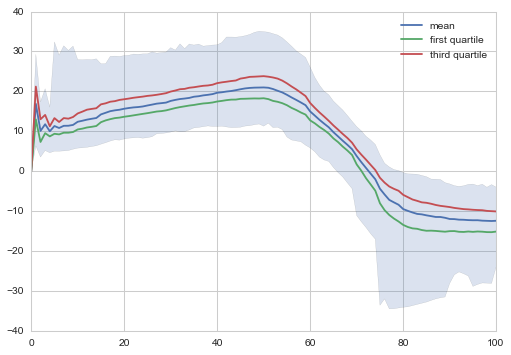

In [50]:
data = ooi_dif

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.median(data, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data.shape[1]),np.min(data, axis=0), np.max(data, axis=0), alpha=0.2)
ax.plot(np.percentile(data, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data, 75, axis=0), label='third quartile')

ax.legend()
plt.show()

In [51]:
temp_outcomes = {'dif':ooi_dif}
results = experiments, temp_outcomes

def classify(data):
    outcome = data['dif'][:,-1]
    classes = np.zeros(outcome.shape)
    classes[outcome<-15] = 1
    return classes

prim_obj = Prim(results, classify, threshold=0.8)

In [52]:
box1 = prim_obj.find_box()
box1.show_tradeoff()
mpld3.display()

[INFO/MainProcess] 1000 points remaining, containing 257 cases of interest
[INFO/MainProcess] mean: 1.0, mass: 0.064, coverage: 0.249027237354, density: 1.0 restricted_dimensions: 12.0


In [53]:
box1.inspect(22)
box1.inspect(23)

coverage    0.813230
density     0.657233
mass        0.318000
mean        0.657233
res dim     4.000000
Name: 22, dtype: float64

                               box 22                         
                                  min        max     qp values
ImpactFactor                 0.800159   0.983298  1.516749e-32
MitigationEnforcementFactor  0.336828   0.999682  3.113564e-03
SDTimeHorizonDistribution    0.018352  17.300519  3.108959e-02
PredictionError              0.012440   0.299938  2.538781e-01

coverage    0.490272
density     0.777778
mass        0.162000
mean        0.777778
res dim     5.000000
Name: 23, dtype: float64

                                           box 23                        \
                                              min                   max   
ImpactFactor                            0.8001594             0.9832978   
GameTheory                   set(["Cooperative"])  set(["Cooperative"])   
MitigationEnforcementFactor             0.3368284          

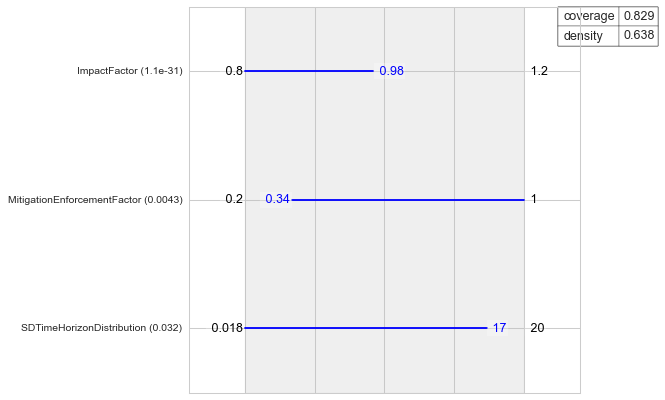

In [32]:
box1.select(22)
box1.drop_restriction('PredictionError')
box1.inspect(style='graph')
plt.show()

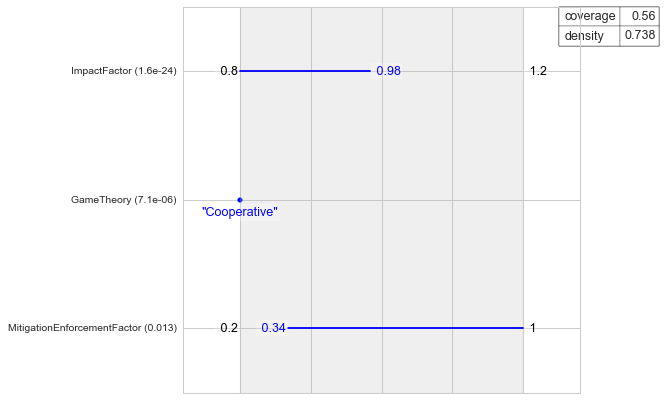

In [34]:
box1.select(23)
box1.drop_restriction('PredictionError')
box1.drop_restriction('SDTimeHorizonDistribution')
box1.inspect(style='graph')
plt.show()

In [37]:
temp_outcomes = {'dif':ooi_dif}
results = experiments, temp_outcomes

def classify(data):
    outcome = data['dif'][:,50]
    classes = np.zeros(outcome.shape)
    classes[outcome>25] = 1
    return classes

prim_obj = Prim(results, classify, threshold=0.8)

In [38]:
box1 = prim_obj.find_box()
box1.show_tradeoff()
mpld3.display()

[INFO/MainProcess] 1000 points remaining, containing 184 cases of interest
[INFO/MainProcess] mean: 0.913793103448, mass: 0.058, coverage: 0.288043478261, density: 0.913793103448 restricted_dimensions: 11.0


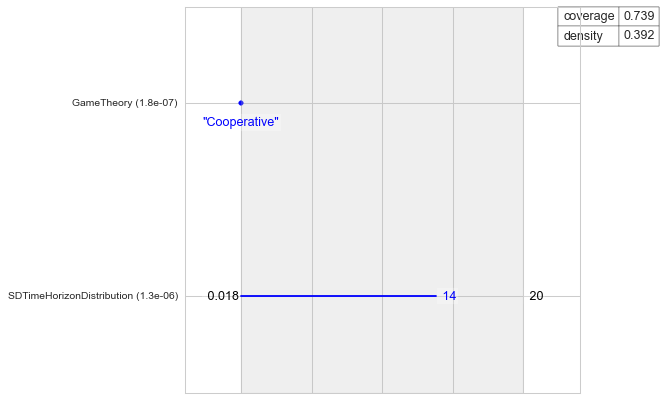

In [42]:
box1.select(10)
box1.drop_restriction('MitigationEnforcementFactor')
box1.inspect(style='graph')
plt.show()

In [54]:
ooi_dif = grouped_results[models[0]][1]['BottomUpMitigationRatio_mean'] - grouped_results[models[1]][1]['BottomUpMitigationRatio_mean']

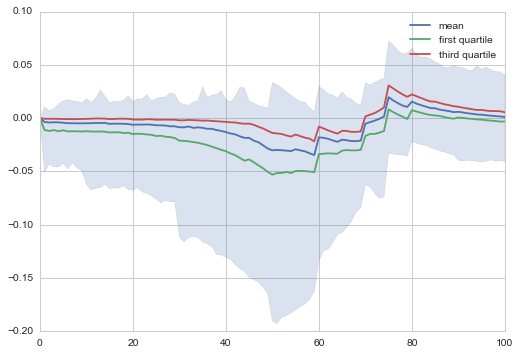

In [55]:
data = ooi_dif

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.median(data, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data.shape[1]),np.min(data, axis=0), np.max(data, axis=0), alpha=0.2)
ax.plot(np.percentile(data, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data, 75, axis=0), label='third quartile')

ax.legend()
plt.show()

In [61]:
temp_outcomes = {'dif':ooi_dif}
results = experiments, temp_outcomes

def classify(data):
    outcome = data['dif'][:,50]
    classes = np.zeros(outcome.shape)
    classes[outcome<-0.02] = 1
    return classes

prim_obj = Prim(results, classify, threshold=0.8)

In [62]:
box1 = prim_obj.find_box()
box1.show_tradeoff()
mpld3.display()

[INFO/MainProcess] 1000 points remaining, containing 651 cases of interest
[INFO/MainProcess] mean: 1.0, mass: 0.202, coverage: 0.310291858679, density: 1.0 restricted_dimensions: 8.0


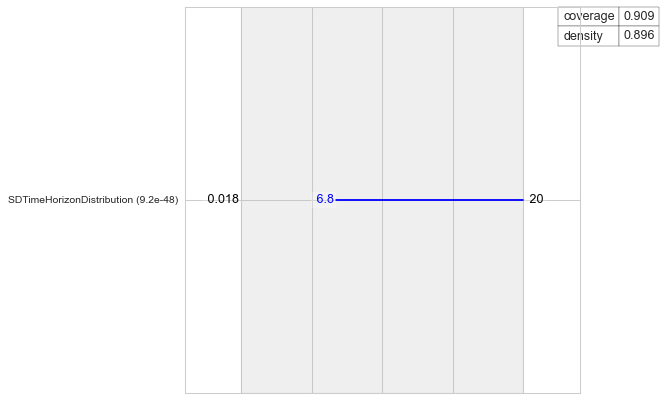

In [63]:
box1.inspect(8, style='graph')
plt.show()